**Лабораторна робота №1**

**Тема: Попередня обробка зображень.**

**Мета: вивчити просторову фільтрацію зображень, методи мінімізації шуму, морфології, виділення країв і границь та елементи бібліотеки OpenCV для розв'язання цих завдань.**
                                  

Вибрати з інтернету два зображення з різною деталізацією об’єктів та два зображення з різним контрастом. Без використання жодних бібліотек для обробки зображень (наприклад, OpenCV) виконати індивідуальне завдання та провести порівняльний аналіз отриманих результатів.
Номер індивідуального завдання відповідає порядковому номеру студента в журналі групи. Якщо номер перевищує максимальну кількість завдань –  береться остача від ділення номера студента на максимальну кількість завдань.  Наприклад, якщо порядковий номер студента у списку – 23, а завдань – 15, тоді індивідуальне завдання матиме номер 23 mod 15 = 8.
                             
                                **Варіант 1.**
1. Виконати 1D лінійну фільтрацію зображення з різними значеннями K i  L.  


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from typing import Union, List

**Точковий оператор**

Зображення збережено: /content/out_gray/output_1_tiger_1.jpg
Зображення збережено: /content/out_gray/output_2_tiger_1.jpg
Зображення збережено: /content/out_gray/output_3_tiger_1.jpg


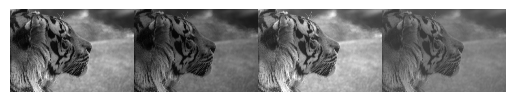

Зображення збережено: /content/out_gray/output_1_cars.jpg
Зображення збережено: /content/out_gray/output_2_cars.jpg
Зображення збережено: /content/out_gray/output_3_cars.jpg


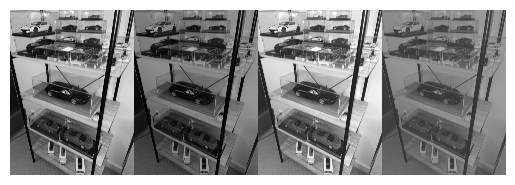

Зображення збережено: /content/out_gray/output_1_high_cont.jpg
Зображення збережено: /content/out_gray/output_2_high_cont.jpg
Зображення збережено: /content/out_gray/output_3_high_cont.jpg


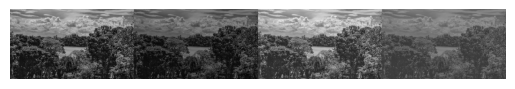

Зображення збережено: /content/out_gray/output_1_low_cont.jpg
Зображення збережено: /content/out_gray/output_2_low_cont.jpg
Зображення збережено: /content/out_gray/output_3_low_cont.jpg


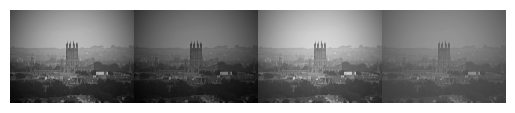

In [ ]:
def to_gray(img: np.ndarray) -> np.ndarray:
    return (
        0.299 * img[..., 2] + 0.587 * img[..., 1] + 0.114 * img[..., 0]
    ).astype(np.uint8)


def point_operation(image: np.ndarray, k: float, l: float) -> np.ndarray:
    new_image = np.clip(image * k + l, 0, 255).astype(np.uint8)
    return new_image


def plot_image(image: np.ndarray) -> None:
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()


def experiment(image_path: str, k: List[float], l: List[float]) -> None:
    assert len(k) == len(l), "The lengths of the parameters l and k do not match"

    img = cv2.imread(image_path)
    if img is None:
        print(f"Не вдалося завантажити зображення за шляхом: {image_path}")
        return

    gray = to_gray(img)
    gray_np = np.array(gray)

    output_dir = "/content/out_gray"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    point_operation_output: List[np.ndarray] = [gray_np]

    for i in range(len(k)):
        out = point_operation(gray, k[i], l[i])
        point_operation_output.append(out)

        output_path = f"{output_dir}/output_{i+1}_{os.path.basename(image_path)}"

        success = cv2.imwrite(output_path, out)
        if success:
            print(f"Зображення збережено: {output_path}")
        else:
            print(f"Не вдалося зберегти зображення за шляхом: {output_path}")

    images_to_plot = np.hstack(point_operation_output)
    plot_image(images_to_plot)


k_parms = [0.7, 1.0, 0.5]
l_parms = [0, 25, 50]

images = [
    '/content/tiger_1.jpg', '/content/cars.jpg',
    '/content/high_cont.jpg', '/content/low_cont.jpg'
]

for el in images:
    experiment(el, k_parms, l_parms)

Змінна K змінює яскравість зображення, а змінна
 L – контрастність зображення. Щодо впливу на деталізацію, то через збільшення яскравості. Зсув яскравості може допомогти «розкрити» деталі в переважно темних або світлих зонах. Якщо ж параметри обрано не коректно, то це також може спричинити втрату деталей через насичення пікселів.

Зображення збережено: /content/out_rgb/output_1_tiger_1.jpg
Зображення збережено: /content/out_rgb/output_2_tiger_1.jpg
Зображення збережено: /content/out_rgb/output_3_tiger_1.jpg


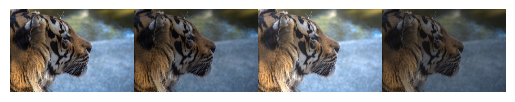

Зображення збережено: /content/out_rgb/output_1_cars.jpg
Зображення збережено: /content/out_rgb/output_2_cars.jpg
Зображення збережено: /content/out_rgb/output_3_cars.jpg


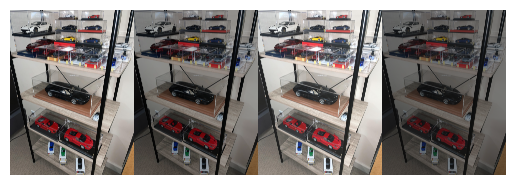

Зображення збережено: /content/out_rgb/output_1_high_cont.jpg
Зображення збережено: /content/out_rgb/output_2_high_cont.jpg
Зображення збережено: /content/out_rgb/output_3_high_cont.jpg


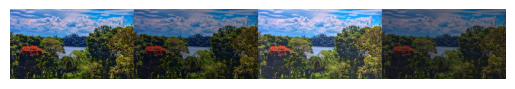

Зображення збережено: /content/out_rgb/output_1_low_cont.jpg
Зображення збережено: /content/out_rgb/output_2_low_cont.jpg
Зображення збережено: /content/out_rgb/output_3_low_cont.jpg


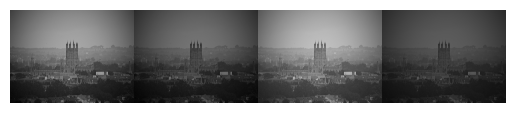

In [ ]:
def point_operation_rgb(image: np.ndarray, k: float, l: float) -> np.ndarray:
    new_image = np.clip(image * k + l, 0, 255).astype(np.uint8)
    return new_image


def plot_image(image: np.ndarray) -> None:
    plt.imshow(image)
    plt.axis('off')
    plt.show()


def experiment_rgb(image_path: str, k: List[float], l: List[float]) -> None:
    assert len(k) == len(l), "The lengths of the parameters l and k do not match"

    img = cv2.imread(image_path)
    if img is None:
        print(f"Не вдалося завантажити зображення за шляхом: {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    point_operation_output = [img]

    output_dir = "/content/out_rgb"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i in range(len(k)):
        out = point_operation_rgb(img, k[i], l[i])
        point_operation_output.append(out)

        output_path = f"{output_dir}/output_{i+1}_{os.path.basename(image_path)}"

        success = cv2.imwrite(output_path, cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
        if success:
            print(f"Зображення збережено: {output_path}")
        else:
            print(f"Не вдалося зберегти зображення за шляхом: {output_path}")


    images_to_plot = np.hstack(point_operation_output)
    plot_image(images_to_plot)


k_parms = [0.7, 1.0, 0.5]
l_parms = [0, 25, 10]

images = [
    '/content/tiger_1.jpg', '/content/cars.jpg',
    '/content/high_cont.jpg', '/content/low_cont.jpg'
]

for el in images:
    experiment_rgb(el, k_parms, l_parms)

Аналогічна ситуація і з RGB зображеннями, тобто ми можемо використовувати точковий оператор і до RGB зображень для кожного каналу відповідно.

In [ ]:
def read_image(path: str) -> np.ndarray:
    img = cv2.imread(path)
    if img is None:
        print(f"Не вдалося завантажити зображення за шляхом: {path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def to_gray(image: np.ndarray) -> List[List[int]]:
    return (
        0.299 * image[..., 2] + 0.587 * image[..., 1] + 0.114 * image[..., 0]
    ).astype(np.uint8)


def display_images(images: List[np.ndarray], titles: List[str], cmap: str = "gray"):
    n = len(images)
    plt.figure(figsize=(4 * n, 4))
    for idx in range(n):
        plt.subplot(1, n, idx + 1)
        plt.imshow(images[idx], cmap=cmap, vmin=0, vmax=255)
        plt.title(titles[idx])
        plt.axis('off')
    plt.show()

  **Морфологічні операції**

* Розширення (Dilation): Збільшує об'єкти на зображенні, додаючи пікселі до меж об'єктів. Використовується для заповнення маленьких прогалин або для збільшення об'єктів.

* Розмивання (Erosion): Зменшує об'єкти, видаляючи пікселі з їх меж. Застосовується для видалення дрібних шумів або скорочення об'єктів.

* Розкриття (Opening): Розмивання, а потім розширення. Використовується для видалення невеликих шумів або об'єктів, зберігаючи основні структури.

* Закриття (Closing): Розширення, а потім розмивання. Застосовується для закриття прогалин між об'єктами або заповнення малих отворів.


In [ ]:
def erosion(image: np.ndarray, kernel_size: int, padding_value: int = 0) -> np.ndarray:
    if kernel_size <= 0:
        raise ValueError("Kernel size must be a positive integer")

    height = len(image)
    width = len(image[0])
    k = kernel_size // 2

    padded_image = np.pad(
        image, ((k, k), (k, k)),
        mode='constant',
        constant_values=padding_value
    )

    eroded = []

    for i in range(height):
        row = []
        for j in range(width):
            min_val = 255
            #start_i = max(i - k, 0)
            #end_i = min(i + k + 1, height)
            #start_j = max(j - k, 0)
            #end_j = min(j + k + 1, width)
            for ni in range(i, i + kernel_size):
                for nj in range(j, j + kernel_size):
                    if padded_image[ni][nj] < min_val:
                        min_val = padded_image[ni][nj]
            row.append(min_val)
        eroded.append(row)

    return np.array(eroded).astype(np.uint8)

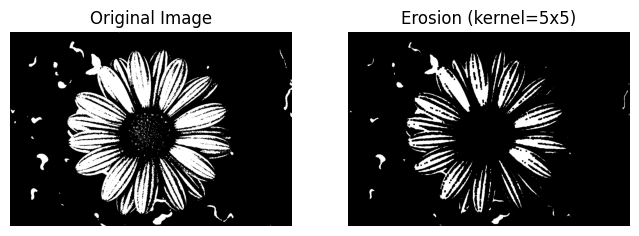

In [ ]:
image_path = "/content/binary_image.png"
image_data = read_image(image_path)

gray_image = to_gray(image_data)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
eroded_image = erosion(binary_image, kernel_size=5)

display_images(
    [binary_image, eroded_image],
    ["Original Image", "Erosion (kernel=5x5)"]
)

In [ ]:
def dilation(image: np.ndarray, kernel_size: int, padding_value: int = 0) -> np.ndarray:
    if kernel_size <= 0:
        raise ValueError("Kernel size must be a positive integer")

    height = len(image)
    width = len(image[0])
    k = kernel_size // 2

    padded_image = np.pad(
        image, ((k, k), (k, k)),
        mode='constant',
        constant_values=padding_value
    )

    dilated = []

    for i in range(height):
        row = []
        for j in range(width):
            max_val = 0
            #start_i = max(i - k, 0)
            #end_i = min(i + k + 1, height)
            #start_j = max(j - k, 0)
            #end_j = min(j + k + 1, width)
            for ni in range(i, i + kernel_size):
                for nj in range(j, j + kernel_size):
                    if padded_image[ni][nj] > max_val:
                        max_val = padded_image[ni][nj]
            row.append(max_val)
        dilated.append(row)

    return np.array(dilated).astype(np.uint8)

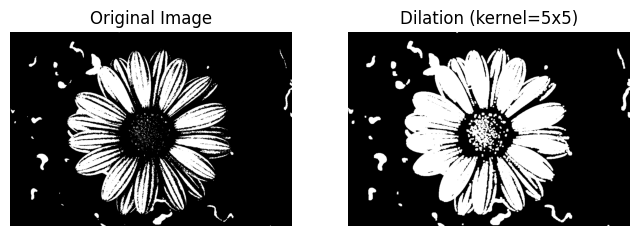

In [ ]:
image_path = "/content/binary_image.png"
image_data = read_image(image_path)

gray_image = to_gray(image_data)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
dilated_image = dilation(binary_image, kernel_size=5)

display_images(
    [binary_image, dilated_image],
    ["Original Image", "Dilation (kernel=5x5)"]
)

In [ ]:
def opening(image: np.ndarray, kernel_size: int, padding_value: int = 0) -> np.ndarray:
    eroded_image = erosion(image, kernel_size, padding_value)
    opened_image = dilation(eroded_image, kernel_size, padding_value)
    return opened_image


def closing(image: np.ndarray, kernel_size: int, padding_value: int = 0) -> np.ndarray:
    dilated_image = dilation(image, kernel_size, padding_value)
    closed_image = erosion(dilated_image, kernel_size, padding_value)
    return closed_image

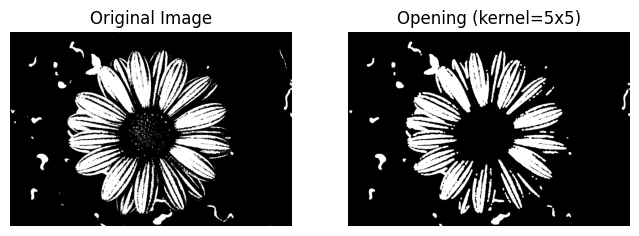

In [ ]:
image_path = "/content/binary_image.png"
image_data = read_image(image_path)

gray_image = to_gray(image_data)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
opening_image = opening(binary_image, kernel_size=5)

display_images(
    [binary_image, opening_image],
    ["Original Image", "Opening (kernel=5x5)"]
)

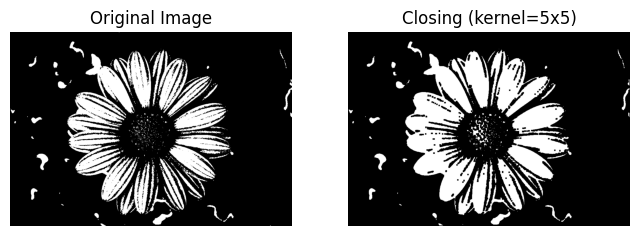

In [ ]:
image_path = "/content/binary_image.png"
image_data = read_image(image_path)

gray_image = to_gray(image_data)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
closing_image = closing(binary_image, kernel_size=5)

display_images(
    [binary_image, closing_image],
    ["Original Image", "Closing (kernel=5x5)"]
)

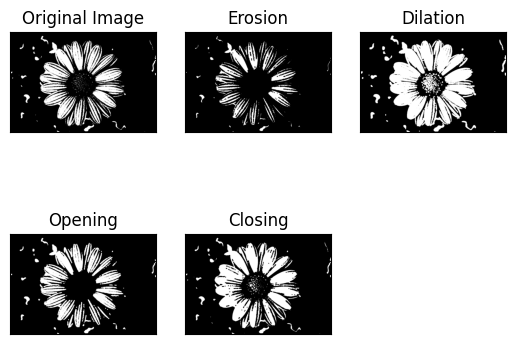

In [ ]:
image = cv2.imread('/content/binary_image.png', 0)
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations=1)
dilation = cv2.dilate(image, kernel, iterations=1)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [image, erosion, dilation, opening, closing]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


**Висновки**

У даній лабораторній роботі було реалізовано точковий оператор та морфологічні операції, без застосування сторонніх бібліотек. Завдяки цьому було продемонстровано:

* Точковий оператор:
 Змінна K відповідає за зміну яскравості, а L – за регулювання контрастності. Правильне налаштування цих параметрів дозволяє «розкрити» деталі в темних або світлих зонах, тоді як їх неправильне значення може призвести до насичення пікселів і втрати інформації.

* Морфологічні операції:
  * Розширення (Dilation): додає пікселі до меж об'єктів, що дозволяє збільшити їх розміри або заповнити дрібні прогалини.
  * Розмивання (Erosion): видаляє пікселі з меж об'єктів, зменшуючи їх розміри та усуваючи дрібні шуми.
  * Розкриття (Opening): поєднує розмивання та розширення для видалення невеликих шумів при збереженні основної структури об'єктів.
  * Закриття (Closing): застосовує розширення перед розмиванням, що сприяє закриттю прогалин між об'єктами або заповненню малих отворів.